In [1]:
#Imported python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report
from sklearn.metrics import log_loss, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
#connect the dataset with jupyter notebook with the help of pandas library
df = pd.read_csv('C:/Users/baps/OneDrive/Desktop/Alfido Tech/tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Check the shape of dataset
df.shape

(418, 12)

In [5]:
#Check the information of DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
#Check the Describe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


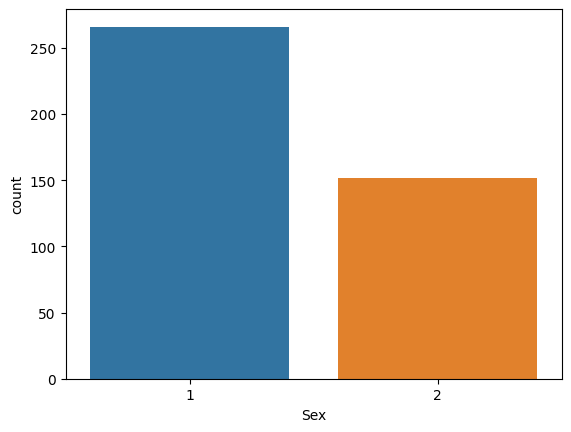

In [23]:
sns.countplot(x='Sex' , data = df)
plt.show()

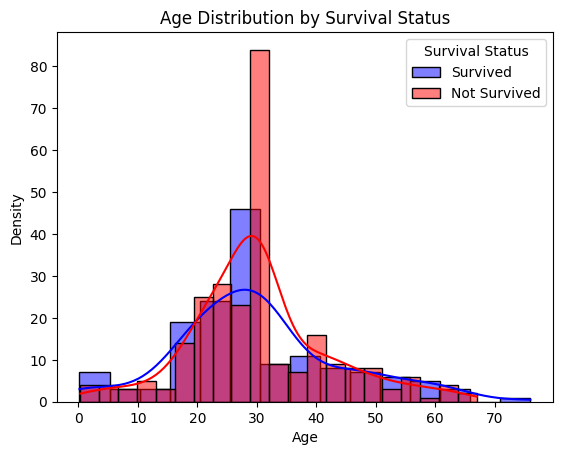

In [25]:
# Create a distribution plot for passengers who survived
sns.histplot(data=df[df['Survived'] == 1], x='Age', kde=True, color='blue', label='Survived')

# Create a distribution plot for passengers who did not survive
sns.histplot(data=df[df['Survived'] == 0], x='Age', kde=True, color='red', label='Not Survived')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')

# Add a legend
plt.legend(title='Survival Status')

plt.show()

In [7]:
#Encode the Object Features
#This will fill the empty cells present in dataset
label_encoder = LabelEncoder()
df['Cabin'] = label_encoder.fit_transform(df['Cabin'])
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Ticket'] = label_encoder.fit_transform(df['Ticket'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,206,male,34.5,0,0,152,7.8292,76,1
1,893,1,3,403,female,47.0,1,0,221,7.0000,76,2
2,894,0,2,269,male,62.0,0,0,73,9.6875,76,1
3,895,0,3,408,male,27.0,0,0,147,8.6625,76,2
4,896,1,3,178,female,22.0,1,1,138,12.2875,76,2


In [9]:
#Fill the null values with there mean value
df.fillna(df['Age'].mean(),inplace = True)
df.fillna(df['Fare'].mean(),inplace = True)
df.fillna(df['Cabin'].mean(),inplace = True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,206,male,34.5,0,0,152,7.8292,76,1
1,893,1,3,403,female,47.0,1,0,221,7.0000,76,2
2,894,0,2,269,male,62.0,0,0,73,9.6875,76,1
3,895,0,3,408,male,27.0,0,0,147,8.6625,76,2
4,896,1,3,178,female,22.0,1,1,138,12.2875,76,2


In [11]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
#Replace the male and female with 1,2
df['Sex'] = df['Sex'].replace({'male':1,'female':2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,206,1,34.5,0,0,152,7.8292,76,1
1,893,1,3,403,2,47.0,1,0,221,7.0000,76,2
2,894,0,2,269,1,62.0,0,0,73,9.6875,76,1
3,895,0,3,408,1,27.0,0,0,147,8.6625,76,2
4,896,1,3,178,2,22.0,1,1,138,12.2875,76,2


In [13]:
#Catagorized the Features
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

In [14]:
#Split the data into train test set
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
#Creating our Supervised Learning Model
model = LogisticRegression()

In [16]:
model.fit(x_train,y_train)

C:\Users\baps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#After creating model use it on test set
y_pred = model.predict(x_test)

In [18]:
#After use it on test set, compare it with other dataset (y_pred)
compare_df = pd.DataFrame({'Actual':y_test,'Predicted': y_pred})

In [19]:
compare_df

,Actual,Predicted
321,0,0
324,1,1
388,0,0
56,0,0
153,1,1
...,...,...
57,0,0
126,0,0
24,1,1
17,0,0


In [20]:
#Calculate Loss Functions
loss = log_loss(y_test, model.predict_proba(x_test))
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

print(f'Log Loss:   {loss:.2f}')
print(f'MSE:        {mse}')
print(f'MAE:        {mae}')
print(f'R2 Score:   {r2}')
      

Log Loss:   0.06
MSE:        0.0
MAE:        0.0
R2 Score:   1.0


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [22]:
print(f'accuracy: {accuracy}')

accuracy: 1.0


#### Our model is 100 percent Accurate